In [86]:
import numpy as np 
import matplotlib.pyplot as plt
from scipy.signal import dimpulse, dlti, dlsim, residue, lfilter, freqz
from sympy import symbols, simplify

In [87]:
#Define common usage:
N = 200 #100 samples using to gather the data.
#n = np.arange(0, N, dtype=np.float64)  # Ensure n is of float64 type
# Define the range of n values
n = np.arange(-100, 100,dtype=np.float64)  # From n = -100 to n = 100
#n = np.arange(0, N) -> Output with int64
#lfilter expects input types as float32, float64


In [88]:
#Question a
# Define the symbolic variable
z = symbols('z')

In [89]:
# H(z) equation
# H(z) = 1 - z^-10
H_z = 1 - z**-10

In [90]:
numerator = [1] + [0]*9 + [-1]  # Coefficients for 1 - z^-10
denominator = [1]  # Coefficients for the denominator
#With this equation function try to use is IMPROPER. 
#Hàm truyền này có bậc tử số bằng 1 và bậc mẫu số bằng 1. ở cả tử số và mẫu số, 
# nó sẽ tạo ra tình huống trong đó hàm truyền được xác định không chính xác (tức là, bậc của tử số và mẫu số không tương thích để chuyển đổi sang dạng không gian trạng thái).
#vi vay khong dung ham truyen dimpulse va dlti. Phai dung lfilter

In [91]:
# Compute the impulse response
h = lfilter(numerator, denominator,n )

In [92]:
# Print the impulse response values
print("Impulse Response h(n):")
print(h)

Impulse Response h(n):
[-100.  -99.  -98.  -97.  -96.  -95.  -94.  -93.  -92.  -91.   10.   10.
   10.   10.   10.   10.   10.   10.   10.   10.   10.   10.   10.   10.
   10.   10.   10.   10.   10.   10.   10.   10.   10.   10.   10.   10.
   10.   10.   10.   10.   10.   10.   10.   10.   10.   10.   10.   10.
   10.   10.   10.   10.   10.   10.   10.   10.   10.   10.   10.   10.
   10.   10.   10.   10.   10.   10.   10.   10.   10.   10.   10.   10.
   10.   10.   10.   10.   10.   10.   10.   10.   10.   10.   10.   10.
   10.   10.   10.   10.   10.   10.   10.   10.   10.   10.   10.   10.
   10.   10.   10.   10.   10.   10.   10.   10.   10.   10.   10.   10.
   10.   10.   10.   10.   10.   10.   10.   10.   10.   10.   10.   10.
   10.   10.   10.   10.   10.   10.   10.   10.   10.   10.   10.   10.
   10.   10.   10.   10.   10.   10.   10.   10.   10.   10.   10.   10.
   10.   10.   10.   10.   10.   10.   10.   10.   10.   10.   10.   10.
   10.   10.   10.   10.   1

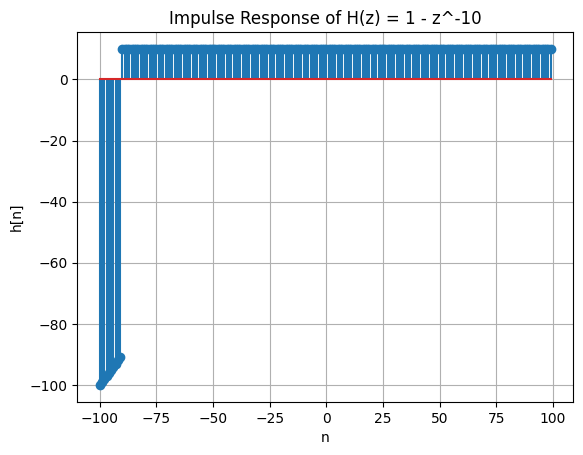

In [93]:

# Plot the impulse response
plt.stem(n, h)
plt.title("Impulse Response of H(z) = 1 - z^-10")
plt.xlabel("n")
plt.ylabel("h[n]")
plt.grid()
plt.show()

In [94]:
#Question b
# Define the input signal x(n) as the unit step function
x = np.ones(N)

In [95]:
# Perform the convolution to find the output y(n)
y = np.convolve(x, h, mode='full')[:N]  # Ensure the length is N

In [96]:
# Print the output values
print("Output y(n):")
print(y)

Output y(n):
[-100. -199. -297. -394. -490. -585. -679. -772. -864. -955. -945. -935.
 -925. -915. -905. -895. -885. -875. -865. -855. -845. -835. -825. -815.
 -805. -795. -785. -775. -765. -755. -745. -735. -725. -715. -705. -695.
 -685. -675. -665. -655. -645. -635. -625. -615. -605. -595. -585. -575.
 -565. -555. -545. -535. -525. -515. -505. -495. -485. -475. -465. -455.
 -445. -435. -425. -415. -405. -395. -385. -375. -365. -355. -345. -335.
 -325. -315. -305. -295. -285. -275. -265. -255. -245. -235. -225. -215.
 -205. -195. -185. -175. -165. -155. -145. -135. -125. -115. -105.  -95.
  -85.  -75.  -65.  -55.  -45.  -35.  -25.  -15.   -5.    5.   15.   25.
   35.   45.   55.   65.   75.   85.   95.  105.  115.  125.  135.  145.
  155.  165.  175.  185.  195.  205.  215.  225.  235.  245.  255.  265.
  275.  285.  295.  305.  315.  325.  335.  345.  355.  365.  375.  385.
  395.  405.  415.  425.  435.  445.  455.  465.  475.  485.  495.  505.
  515.  525.  535.  545.  555.  565.  

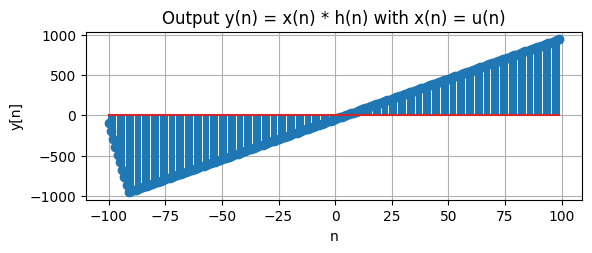

In [97]:
#Plot the output y(n)
plt.subplot(2, 1, 2)
plt.stem(n, y)
plt.title("Output y(n) = x(n) * h(n) with x(n) = u(n)")
plt.xlabel("n")
plt.ylabel("y[n]")
plt.grid()

In [98]:
#Question d
# Define the input signal x(n) = u(n) - 0.5u(n-2)
x1 = np.ones(N)  # u(n)
x1[2:] -= 0.5  # Subtract 0.5u(n-2)

In [99]:
# Perform the convolution to find the output y(n)
y1 = np.convolve(x1, h, mode='full')[:N]  # Ensure the length is N

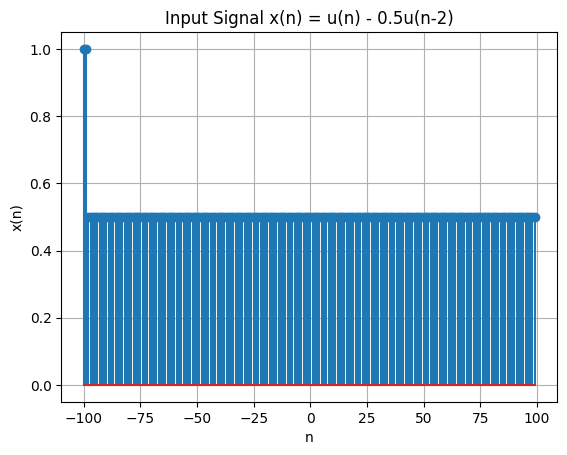

In [100]:
# Plot the input x(n)
plt.stem(n, x1)
plt.title("Input Signal x(n) = u(n) - 0.5u(n-2)")
plt.xlabel("n")
plt.ylabel("x(n)")
plt.grid()


In [101]:
# Print the output values
print("Output y(n):")
print(y1)

Output y(n):
[-100.  -199.  -247.  -294.5 -341.5 -388.  -434.  -479.5 -524.5 -569.
 -513.  -457.5 -452.5 -447.5 -442.5 -437.5 -432.5 -427.5 -422.5 -417.5
 -412.5 -407.5 -402.5 -397.5 -392.5 -387.5 -382.5 -377.5 -372.5 -367.5
 -362.5 -357.5 -352.5 -347.5 -342.5 -337.5 -332.5 -327.5 -322.5 -317.5
 -312.5 -307.5 -302.5 -297.5 -292.5 -287.5 -282.5 -277.5 -272.5 -267.5
 -262.5 -257.5 -252.5 -247.5 -242.5 -237.5 -232.5 -227.5 -222.5 -217.5
 -212.5 -207.5 -202.5 -197.5 -192.5 -187.5 -182.5 -177.5 -172.5 -167.5
 -162.5 -157.5 -152.5 -147.5 -142.5 -137.5 -132.5 -127.5 -122.5 -117.5
 -112.5 -107.5 -102.5  -97.5  -92.5  -87.5  -82.5  -77.5  -72.5  -67.5
  -62.5  -57.5  -52.5  -47.5  -42.5  -37.5  -32.5  -27.5  -22.5  -17.5
  -12.5   -7.5   -2.5    2.5    7.5   12.5   17.5   22.5   27.5   32.5
   37.5   42.5   47.5   52.5   57.5   62.5   67.5   72.5   77.5   82.5
   87.5   92.5   97.5  102.5  107.5  112.5  117.5  122.5  127.5  132.5
  137.5  142.5  147.5  152.5  157.5  162.5  167.5  172.5  177.5  

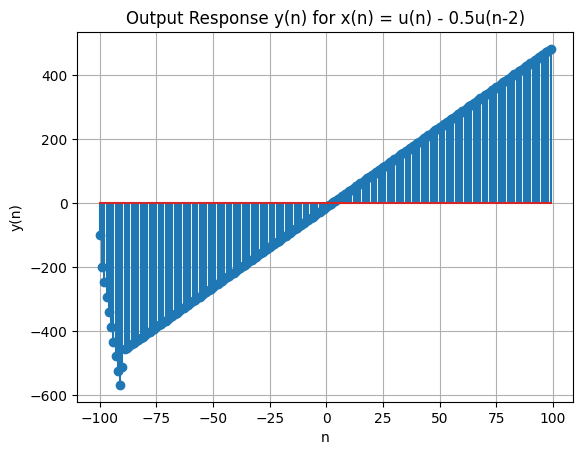

In [102]:
# Plot the output y(n)
plt.figure()
plt.stem(n, y1)
plt.title("Output Response y(n) for x(n) = u(n) - 0.5u(n-2)")
plt.xlabel("n")
plt.ylabel("y(n)")
plt.grid()
plt.show()
